In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv("Month_Value_1.csv")
print(df)

        Period      Revenue  Sales_quantity  Average_cost  \
0   01.01.2015  16010072.12         12729.0   1257.763541   
1   01.02.2015  15807587.45         11636.0   1358.507000   
2   01.03.2015  22047146.02         15922.0   1384.697024   
3   01.04.2015  18814583.29         15227.0   1235.606705   
4   01.05.2015  14021479.61          8620.0   1626.621765   
..         ...          ...             ...           ...   
91  01.08.2022          NaN             NaN           NaN   
92  01.09.2022          NaN             NaN           NaN   
93  01.10.2022          NaN             NaN           NaN   
94  01.11.2022          NaN             NaN           NaN   
95  01.12.2022          NaN             NaN           NaN   

    The_average_annual_payroll_of_the_region  
0                                 30024676.0  
1                                 30024676.0  
2                                 30024676.0  
3                                 30024676.0  
4                               

In [17]:
df = df.dropna()
print(df)

        Period      Revenue  Sales_quantity  Average_cost  \
0   01.01.2015  16010072.12         12729.0   1257.763541   
1   01.02.2015  15807587.45         11636.0   1358.507000   
2   01.03.2015  22047146.02         15922.0   1384.697024   
3   01.04.2015  18814583.29         15227.0   1235.606705   
4   01.05.2015  14021479.61          8620.0   1626.621765   
..         ...          ...             ...           ...   
59  01.12.2019  58756473.66         38069.0   1543.420464   
60  01.01.2020  56288300.87         27184.0   2070.640850   
61  01.02.2020  40225243.26         23509.0   1711.057181   
62  01.03.2020  50022165.23         32569.0   1535.882748   
63  01.04.2020  52320692.94         26615.0   1965.834790   

    The_average_annual_payroll_of_the_region  
0                                 30024676.0  
1                                 30024676.0  
2                                 30024676.0  
3                                 30024676.0  
4                               

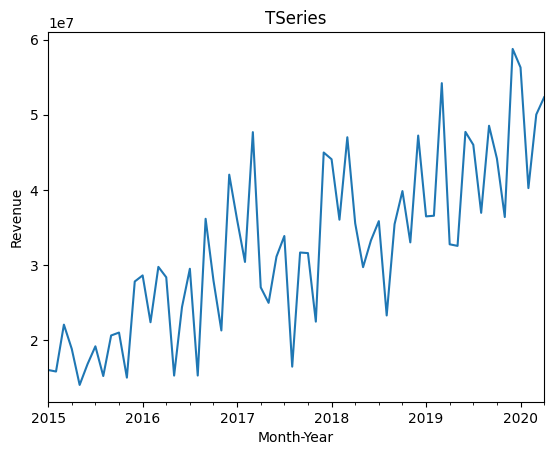

In [18]:
ts_data = pd.Series(df['Revenue'].values, index=pd.date_range(start='2015-01-01', periods=len(df), freq='ME'))

ts_data.plot(title="TSeries", xlabel="Month-Year", ylabel="Revenue")
plt.show()

In [19]:
ad_test = adfuller(ts_data)
print(f"ADF Statistic: {ad_test[0]}")
print(f"p-value: {ad_test[1]}")

if ad_test[1] <= 0.05 :
    print("Time Series is stationary")
else:
    print("Time Series is not stationary")

ADF Statistic: -0.2691489373291081
p-value: 0.9297615377352494
Time Series is not stationary


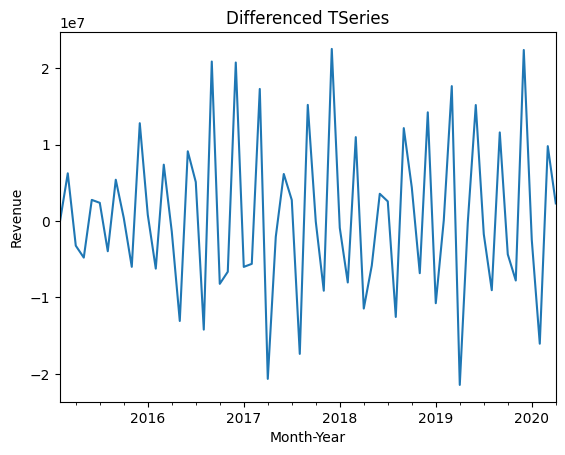

In [20]:
ts_data1 = ts_data.diff().dropna()

ts_data1.plot(title="Differenced TSeries", xlabel="Month-Year", ylabel="Revenue")
plt.show()

In [21]:
ad_test = adfuller(ts_data1)
print(f"ADF Statistic: {ad_test[0]}")
print(f"p-value: {ad_test[1]}")

if ad_test[1] <= 0.05 :
    print("Time Series is stationary")
else:
    print("Time Series is not stationary")

ADF Statistic: -5.604330112909431
p-value: 1.2441377990600202e-06
Time Series is stationary


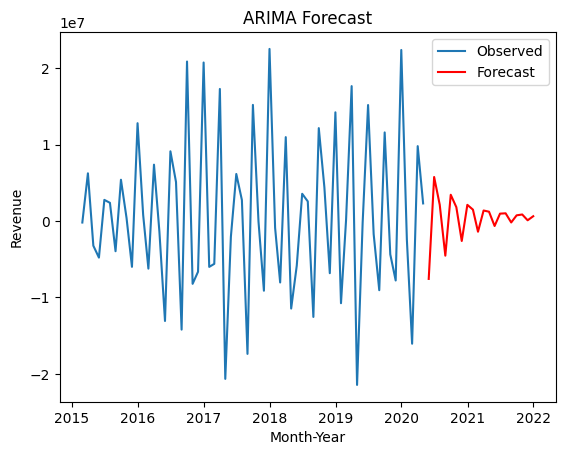

In [22]:
model = ARIMA(ts_data1, order=(2, 1, 1))
model_fit = model.fit()

forecast_data = model_fit.forecast(steps=20)

plt.plot(ts_data1, label='Observed')
plt.plot(forecast_data, label='Forecast', color='red')
plt.title("ARIMA Forecast")
plt.xlabel("Month-Year")
plt.ylabel("Revenue")
plt.legend()
plt.show()


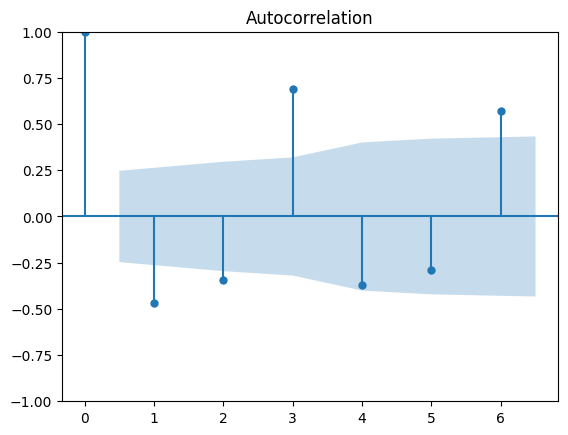

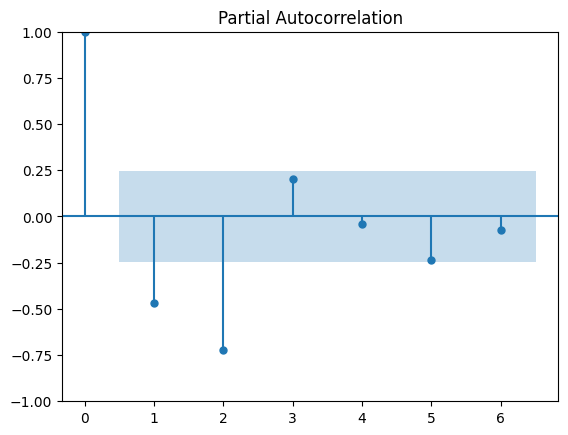

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_data1, lags=6)
plt.show()

plot_pacf(ts_data1, lags=6)
plt.show()